In [4]:
from synutility.SynIO.data_type import load_from_pickle
import networkx as nx
from math import isclose
import time
import numpy as np

from create_partitions_by_invariant import create_partitions_by_invariant
from cluster_reaction_centers import cluster_reaction_centers

In [5]:
def aggregate_charge_and_element_attributes(reaction):
    for node, attributes in reaction.nodes.data():
        attributes["element_charge"] = f"{attributes['element']}{attributes['charge']}"

    return reaction

data = load_from_pickle("/home/mark/Documents/graph_theory/ITS_graphs.pkl.gz")
reactions = [reaction["ITS"] for reaction in data]
reactions = [aggregate_charge_and_element_attributes(reaction) for reaction in reactions]

In [6]:
partitions = cluster_reaction_centers(reactions)

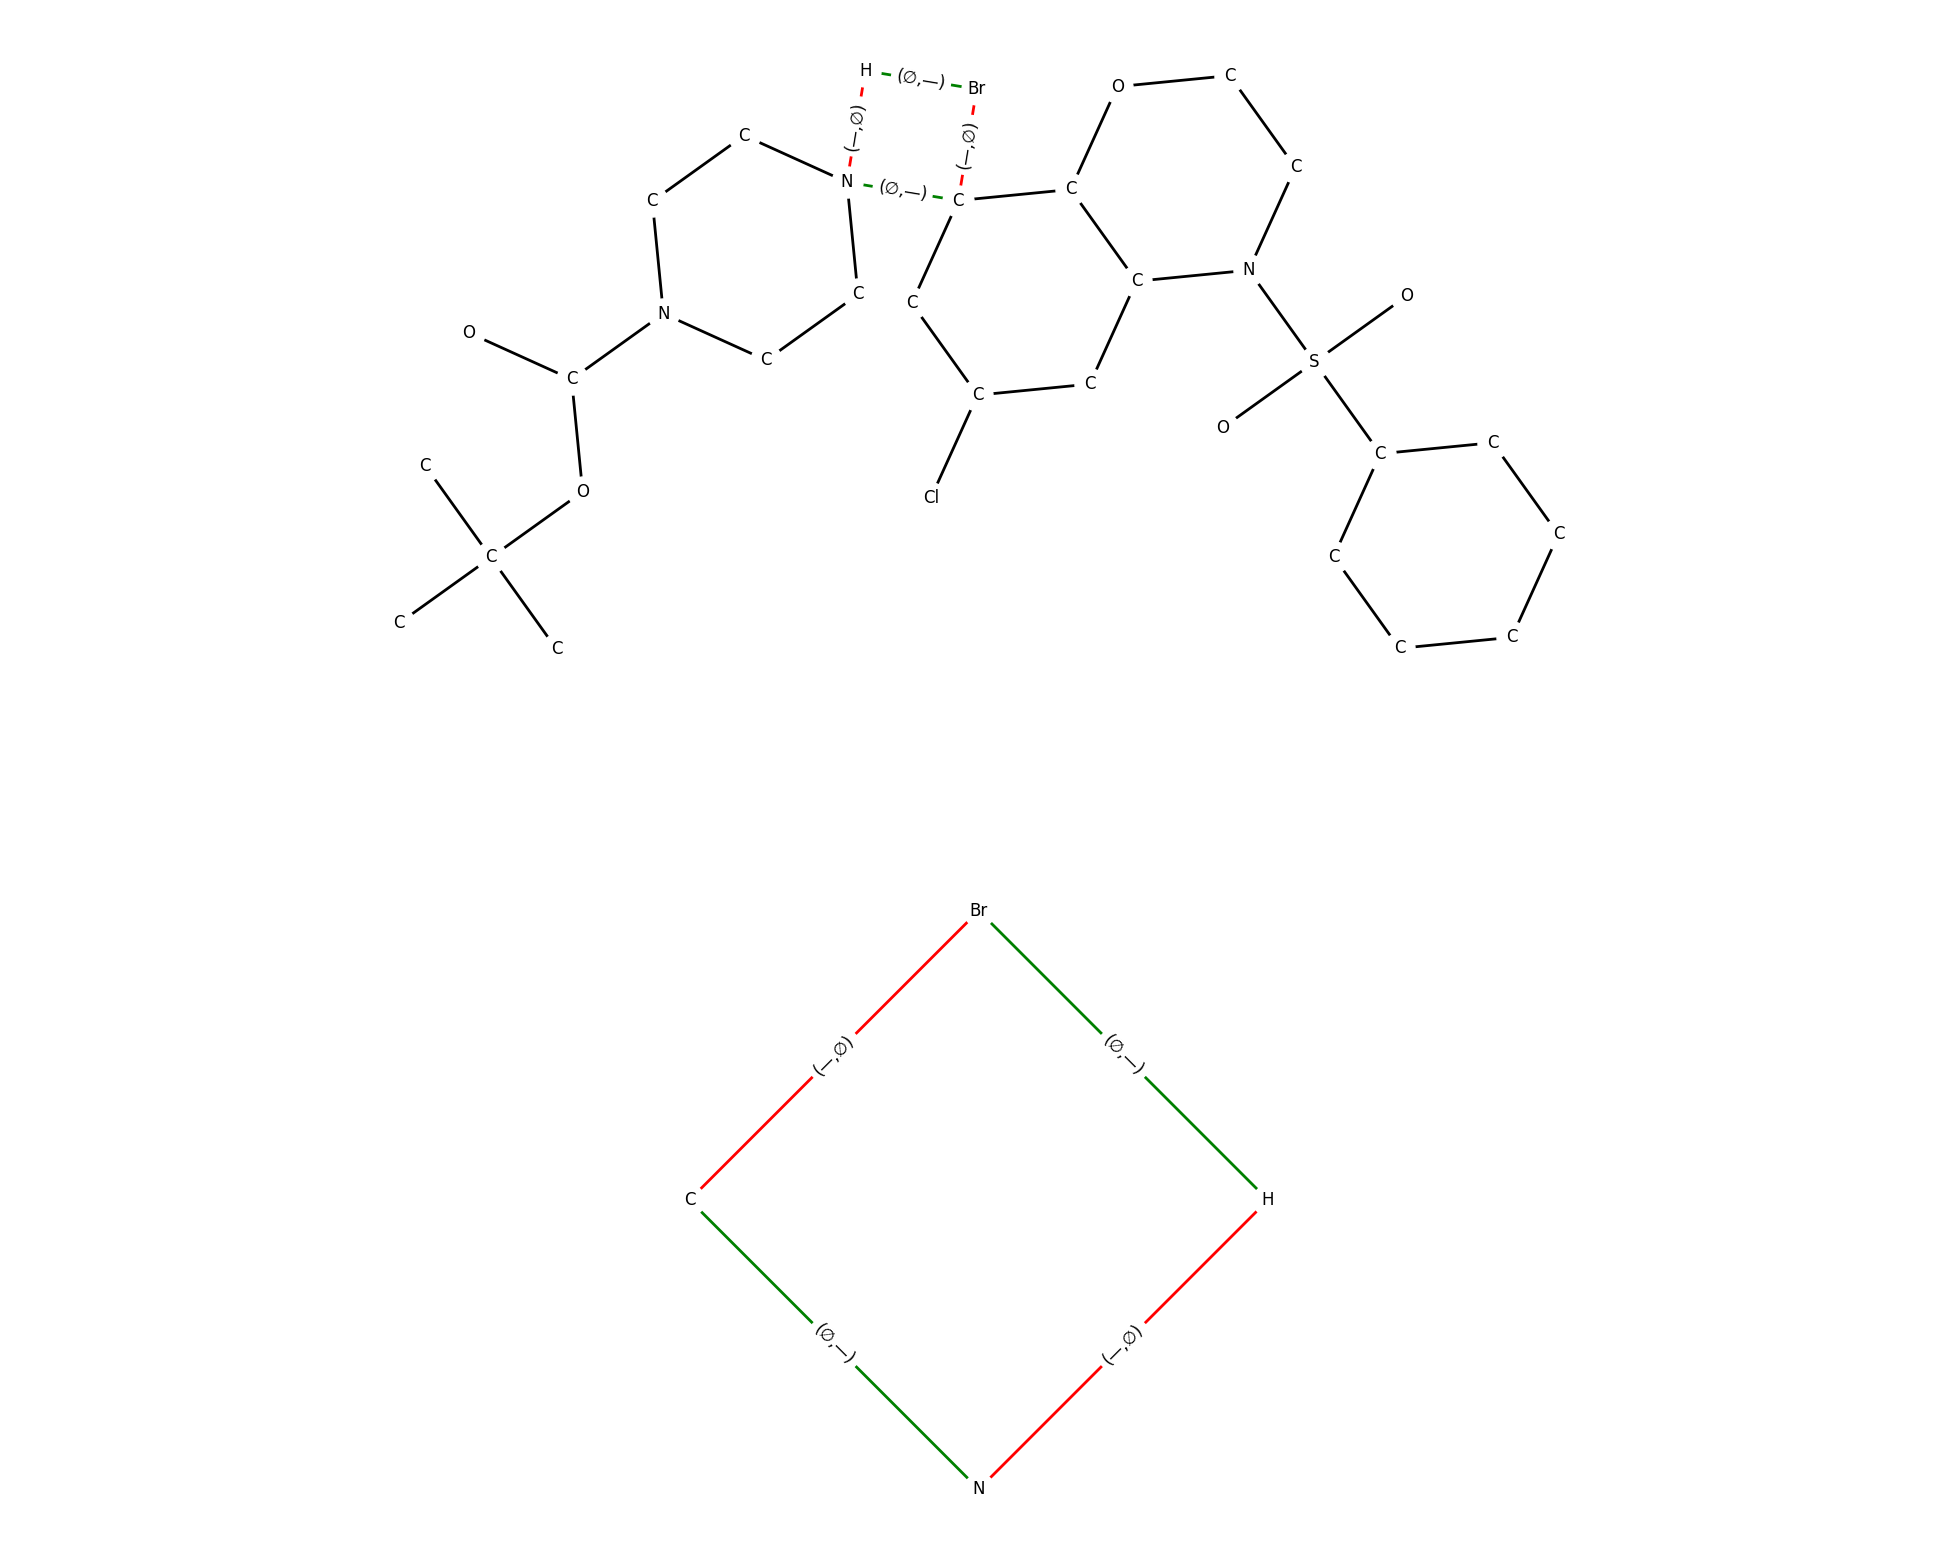

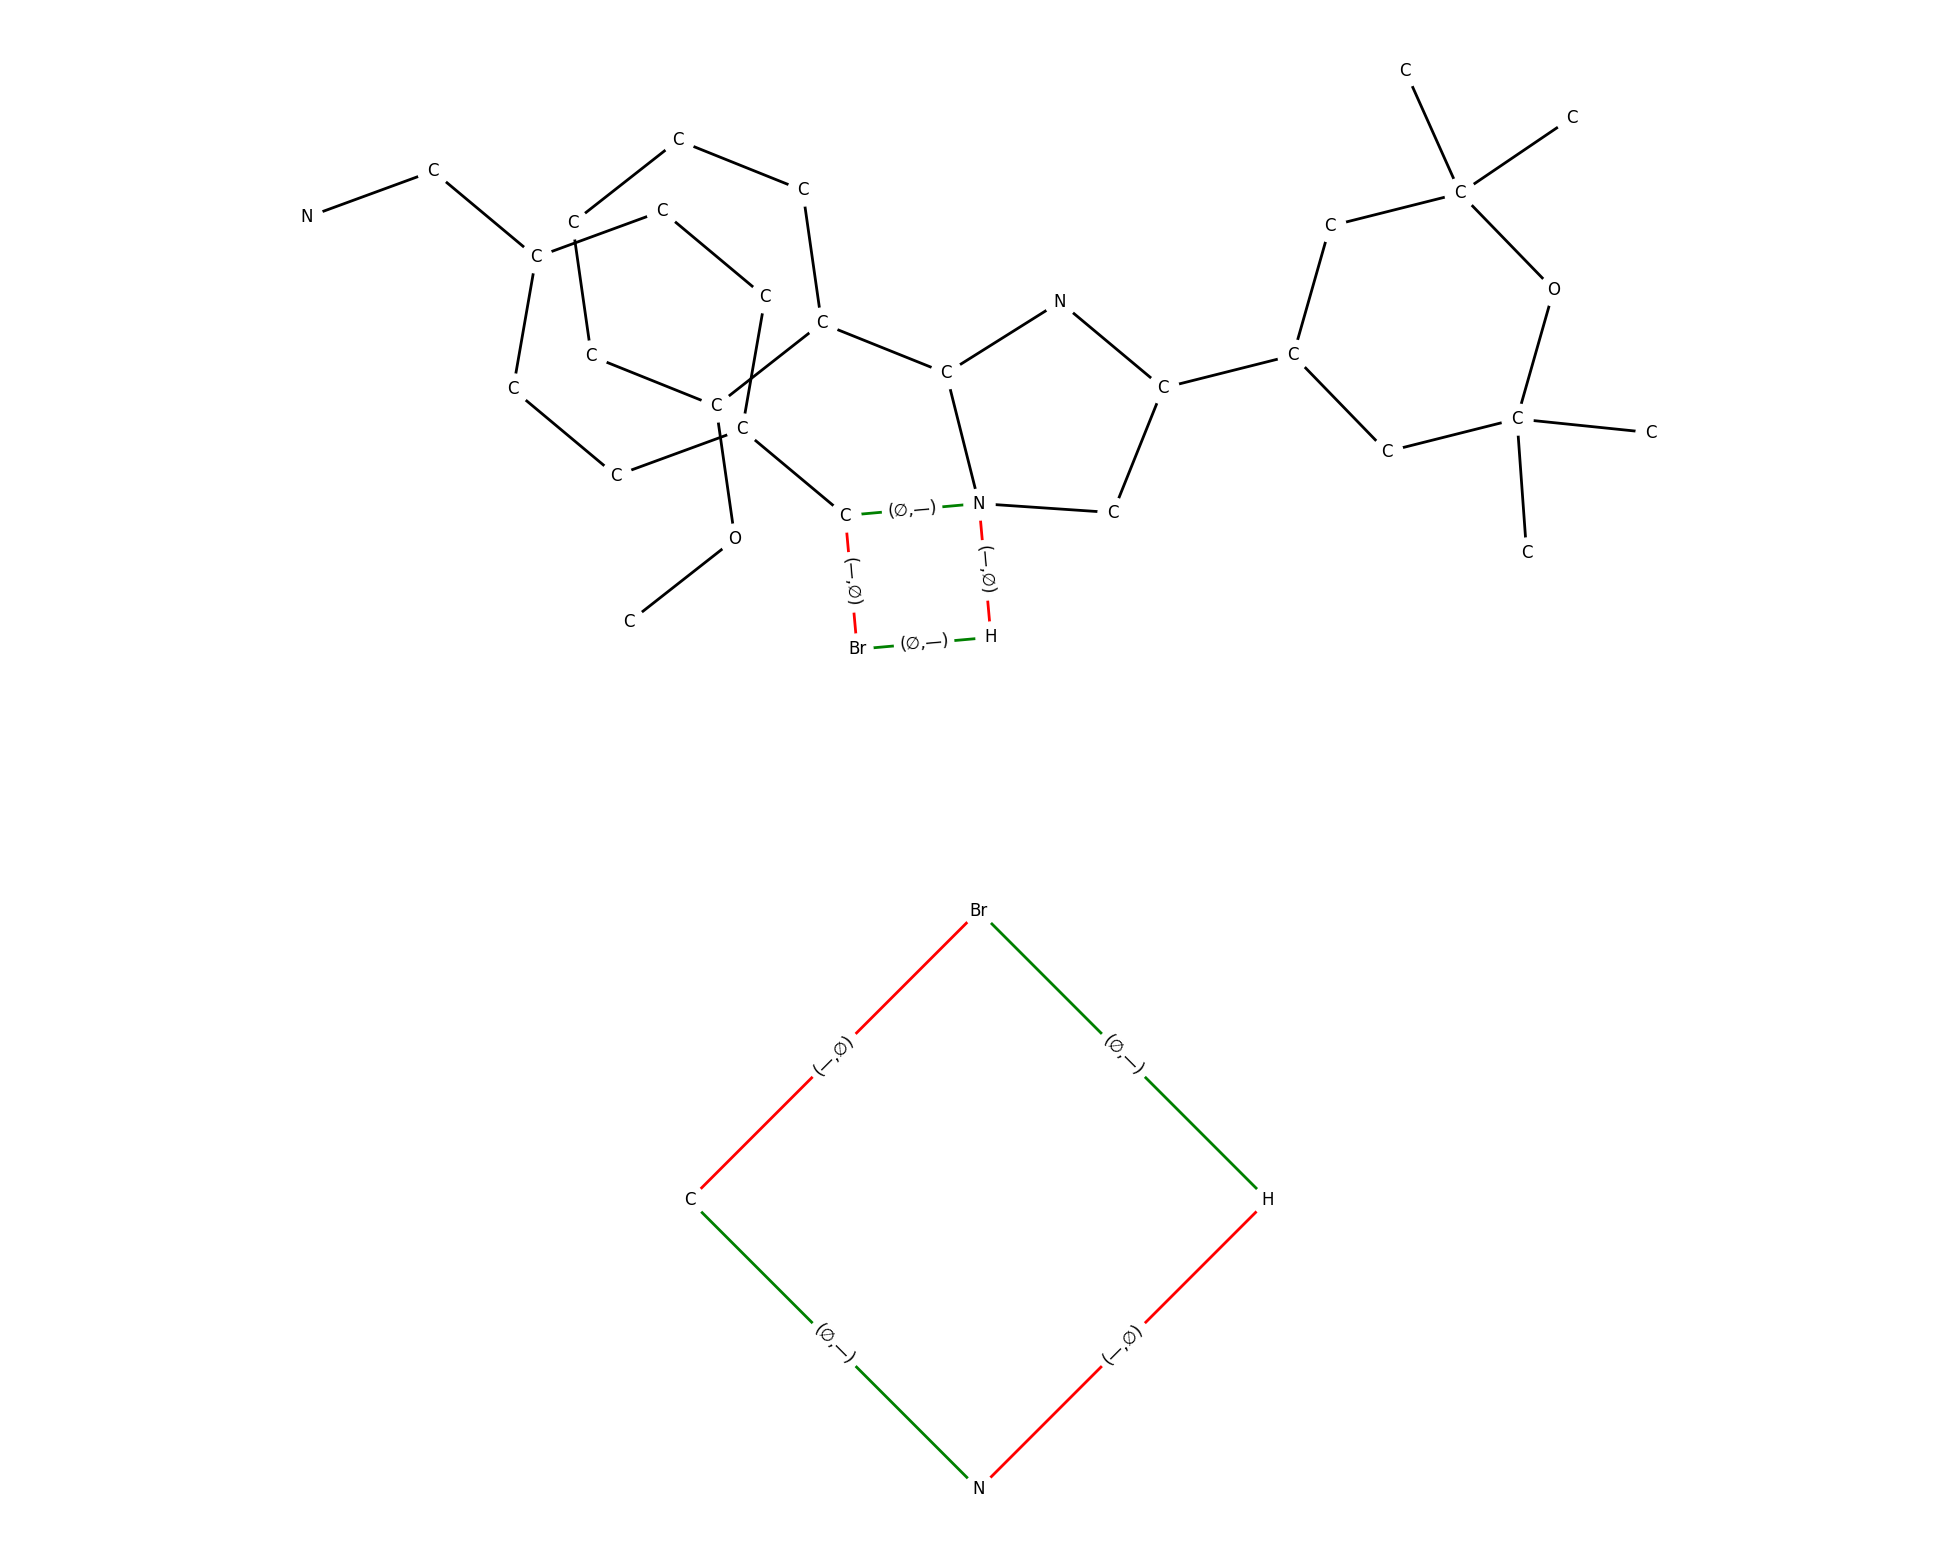

In [8]:
from visualize_graph import visualize_graph

visualize_graph(partitions[0][0])
visualize_graph(partitions[0][1])

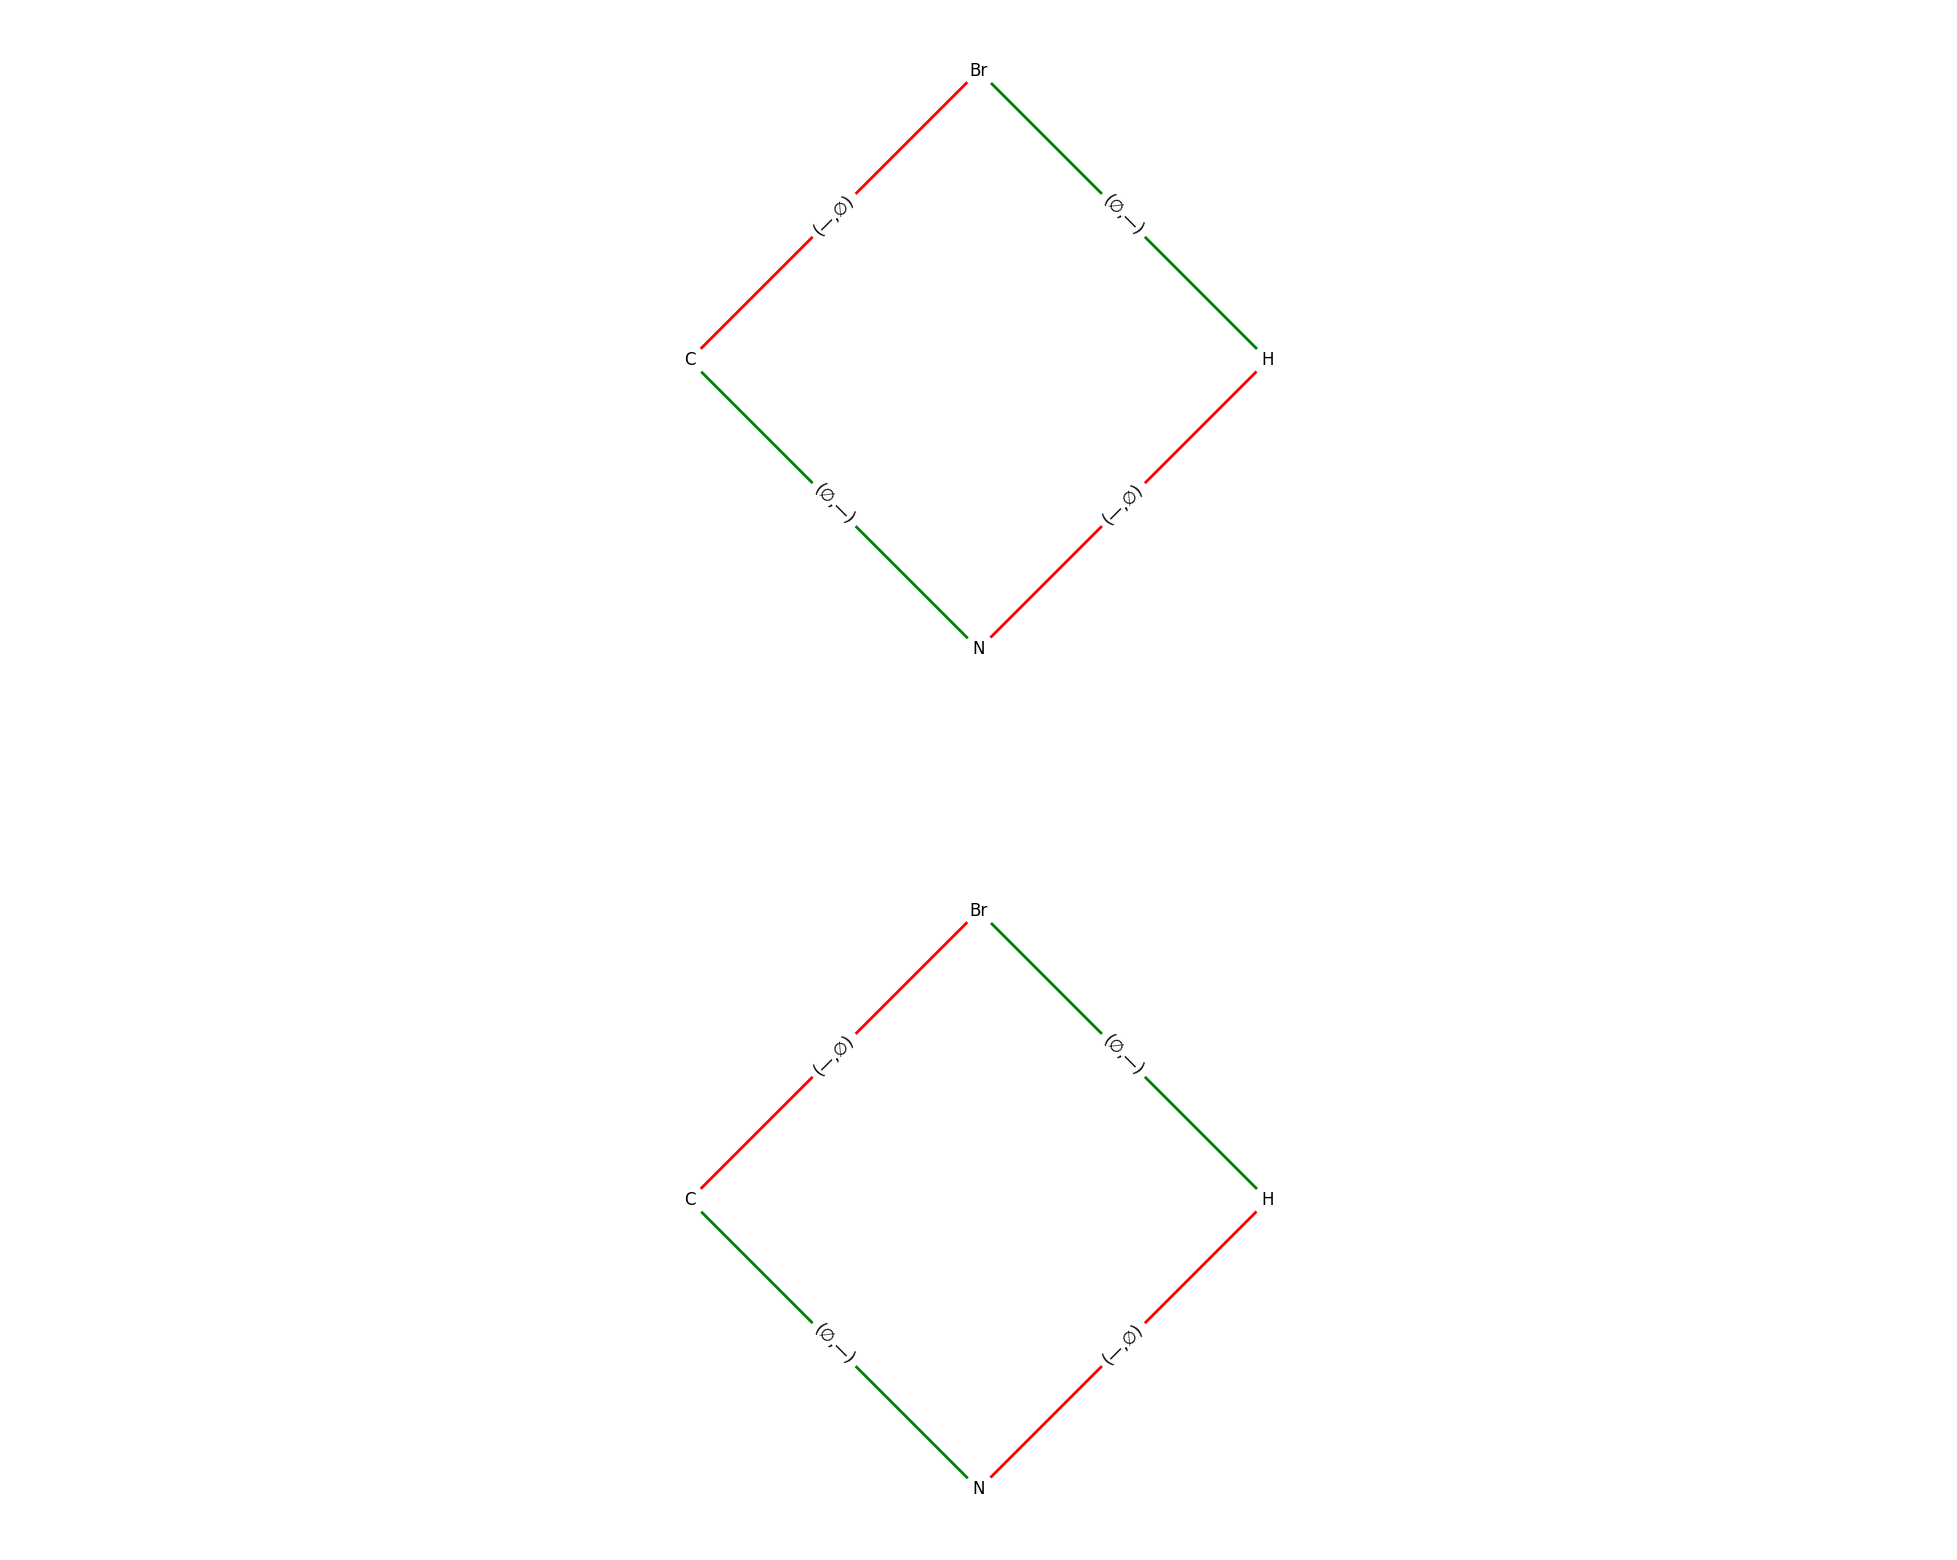

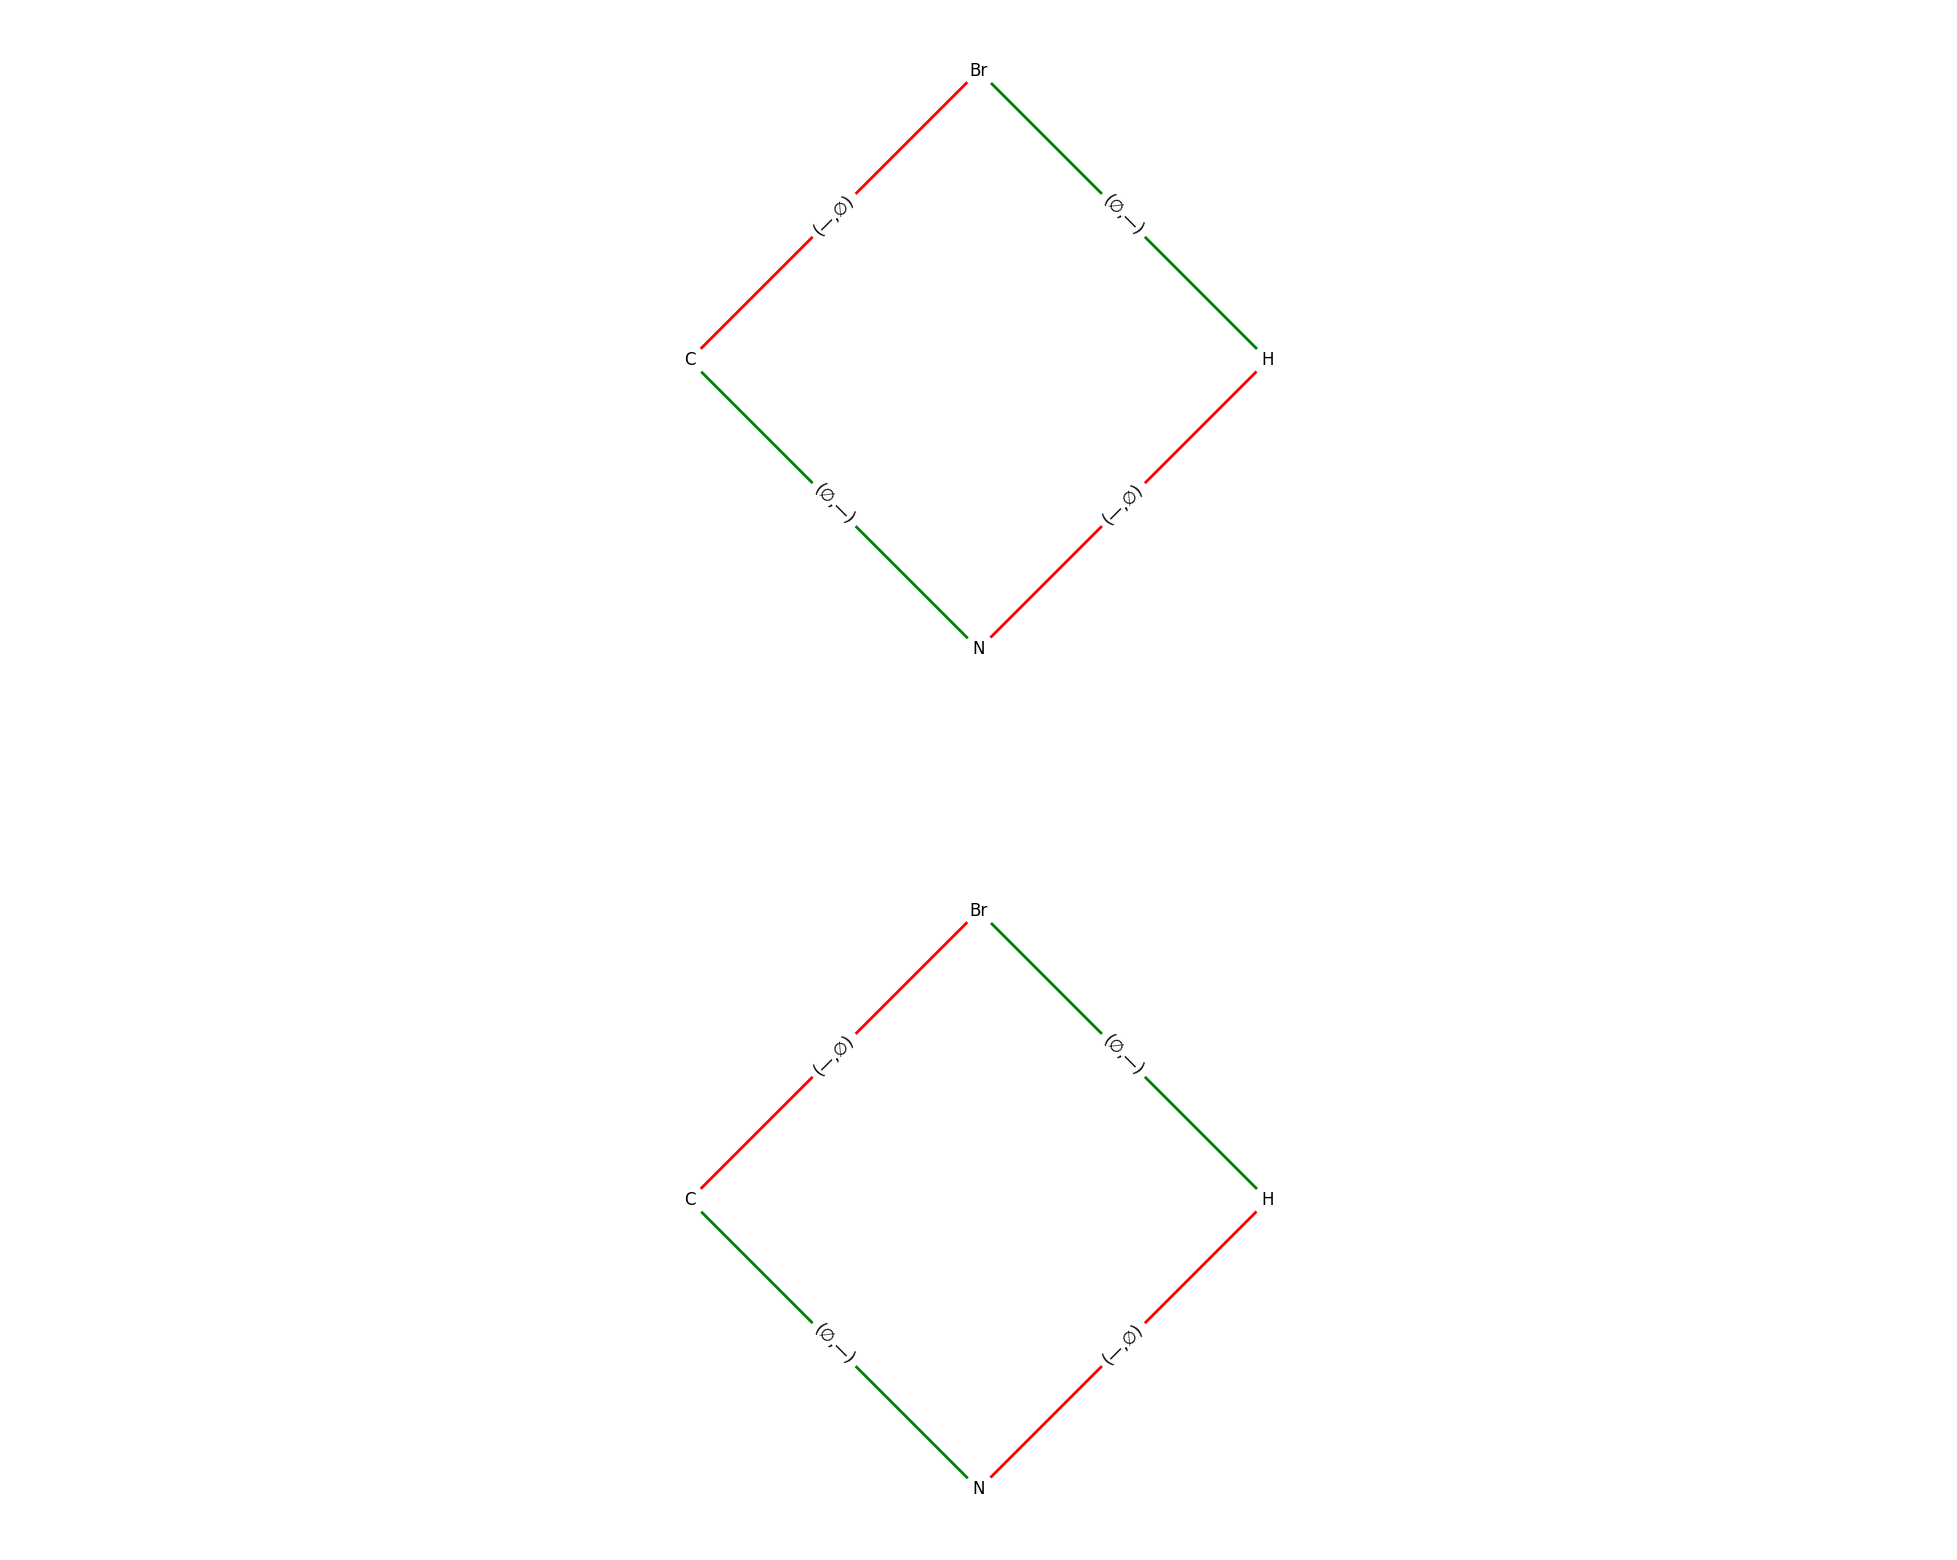

In [9]:
from get_reaction_center import get_reaction_center

reaction_center1 = get_reaction_center(partitions[0][0])
reaction_center2 = get_reaction_center(partitions[0][1])

visualize_graph(reaction_center1)
visualize_graph(reaction_center2)

In [10]:
reaction_center = reaction_center2

c = {}

for node_label in reaction_center.nodes:
    c = {
        **c,
        node_label: 1
    }

l = {}

for iteration in range(1, 3):
    for node_label in reaction_center.nodes:
        neighbours = reaction_center.neighbors(node_label)
        l = {
            **l,
            node_label: (c[node_label], [c[neighbour_label] for neighbour_label in reaction_center.neighbors(node_label)])
        }

    c_new = {}
    for key, value in c.items():
        l1, l2 = l[key]
        h = hash((l1, tuple(l2)))
        c_new = {
            **c_new,
            key: h
        }
    
    c = c_new

print(c_new)

{34: -3234743061493032375, 23: -3234743061493032375, 30: -3234743061493032375, 31: -3234743061493032375}


In [ ]:
keep = c_new

keep

In [ ]:
def create_histogram(input):
    pass

In [8]:

def weisfeiler_leman_2(reaction_center1):
    c1, c2 = {}, {}
    for node_label in reaction_center1.nodes:
        c1[node_label] = 1
    for node_label in reaction_center2.nodes:
        c2[node_label] = 1


    for iteration in range(1, 2):
        l1, l2 = {}, {}
        print("---" + str(iteration) + "---")
        print(c1)
        print("---")
        print(c2)
        print('---')

        # Berechnung von l für reaction_center1
        for node_label in reaction_center1.nodes:
            neighbours1 = reaction_center1.neighbors(node_label)
            l1[node_label] = (c1[node_label], [c1[neighbour_label] for neighbour_label in neighbours1])
        
        # Berechnung von l für reaction_center2
        for node_label in reaction_center2.nodes:
            neighbours2 = reaction_center2.neighbors(node_label)
            l2[node_label] = (c2[node_label], [c2[neighbour_label] for neighbour_label in neighbours2])

        # Berechnung der neuen c-Werte für beide Graphen
        c1_new, c2_new = {}, {}

        for key in c1.keys():
            l1_values = l1[key]
            h1 = hash((l1_values[0], tuple(l1_values[1])))
            c1_new[key] = h1
        
        for key in c2.keys():
            l2_values = l2[key]
            h2 = hash((l2_values[0], tuple(l2_values[1])))
            c2_new[key] = h2


        c1, c2 = c1_new, c2_new



 
    return c1 == c2

In [ ]:
weisfeiler_leman_2(reaction_center1, reaction_center2)

In [14]:
from synutility.SynIO.data_type import load_from_pickle
import networkx as nx
from math import isclose
import time
import numpy as np
from synutility.SynIO.data_type import load_from_pickle
import networkx as nx
from math import isclose
import time
import numpy as np
from create_partitions_by_invariant import create_partitions_by_invariant
from cluster_reaction_centers import cluster_reaction_centers
from get_reaction_center import get_reaction_center
from create_partitions_by_invariant import create_partitions_by_invariant
from cluster_reaction_centers import cluster_reaction_centers
import pickle
def aggregate_charge_and_element_attributes(reaction):
    for node, attributes in reaction.nodes.data():
        attributes["element_charge"] = f"{attributes['element']}{attributes['charge']}"

    return reaction

data = load_from_pickle("/home/mark/Documents/graph_theory/ITS_graphs.pkl.gz")

print("Done loading data.")
reactions = [reaction["ITS"] for reaction in data]
reactions = [aggregate_charge_and_element_attributes(reaction) for reaction in reactions]
reaction_centers = [get_reaction_center(reaction) for reaction in reactions]
print(reaction_centers[1], type(reaction_centers))
print("--------------------------------------")
#partitions = cluster_reaction_centers(reactions)
#print(partitions,type(partitions))
# from visualize_graph import visualize_graph

# visualize_graph(partitions[0][0])
# visualize_graph(partitions[0][1])
#reaction_center1 = get_reaction_center(partitions[0][0])
#reaction_center2 = get_reaction_center(partitions[0][1])
#print("starte in die funktion")
reaction_center1 = reactions[0]
#reaction_center2 = reactions[1]


#recation enter und partion rein
#boolean raus

#node label -->histogramm--> ist im nächsten schritt die gleich verteilung
def weisfeiler_leman_with_convergence(reaction_center, tolerance=10000):
    # Initialisiere die Hash-Werte
    c = {node_label: 1 for node_label in reaction_center.nodes}

    iteration = 0
    while True:
        iteration += 1
        l = {}
        print(f"--- Iteration {iteration} ---")
        #print(c)
        #print("---")

        # Berechnung der neuen Nachbarschaftsrelationen
        for node_label in reaction_center.nodes:
            neighbours = reaction_center.neighbors(node_label)
            l[node_label] = (
                c[node_label],
                [c[neighbour_label] for neighbour_label in neighbours]
            )

        # Berechnung der neuen Hash-Werte
        c_new = {
            key: hash((l_values[0], tuple(l_values[1])))
            for key, l_values in l.items()
        }

        #print("*** Neue Nachbarschaftsrelationen ***")
        #print(l)
        #print("***")

        # Konvergenzprüfung
        differences = [abs(c[key] - c_new[key]) for key in c.keys()]
        max_difference = max(differences)
        # print(max_difference)
        # print(type(max_difference))
        if max_difference < tolerance:
            print(f"Konvergenz erreicht nach {iteration} Iterationen (max. Differenz: {max_difference:.2e}).")
            break

        # Aktualisierung der Hash-Werte
        c = c_new
    print("--- FIN ---")
    print(c)

    return c

def weisfeiler_leman_1(reaction_center1):
    c1 = {}
    for node_label in reaction_center1.nodes:
        c1[node_label] = 1

    for iteration in range(1,3):
        l1 = {}

        # Berechnung von l für reaction_center1
        for node_label in reaction_center1.nodes:
            neighbours1 = reaction_center1.neighbors(node_label)
            l1[node_label] = (c1[node_label], [c1[neighbour_label] for neighbour_label in neighbours1])

        # Neue c-Werte für center1
        c1_new = {}

        for key in c1.keys():
            l1_values = l1[key]
            h1 = hash((l1_values[0], tuple(l1_values[1])))
            c1_new[key] = h1

        c1 = c1_new
    #print(c1)
    return c1


def weisfeiler_leman_2(reaction_center1, reaction_center2):
    # Initialisierung der Hash-Werte für beide Graphen
    c1, c2 = {}, {}

    # Initialisierung von c1 und c2 mit Werten für beide Graphen
    for node_label in reaction_center1.nodes:
        c1[node_label] = 1
    for node_label in reaction_center2.nodes:
        c2[node_label] = 1

    # Iterative Berechnung der Hash-Werte für beide Graphen
    for iteration in range(1, 3):
        l1, l2 = {}, {}
        print("---" + str(iteration) + "---")
        print(c1)
        print("---")
        print(c2)

        # Berechnung von l für reaction_center1
        for node_label in reaction_center1.nodes:
            neighbours1 = reaction_center1.neighbors(node_label)
            l1[node_label] = (c1[node_label], [c1[neighbour_label] for neighbour_label in neighbours1])
        
        # Berechnung von l für reaction_center2
        for node_label in reaction_center2.nodes:
            neighbours2 = reaction_center2.neighbors(node_label)
            l2[node_label] = (c2[node_label], [c2[neighbour_label] for neighbour_label in neighbours2])

        # Berechnung der neuen c-Werte für beide Graphen
        c1_new, c2_new = {}, {}

        for key in c1.keys():
            l1_values = l1[key]
            h1 = hash((l1_values[0], tuple(l1_values[1])))
            c1_new[key] = h1
        
        for key in c2.keys():
            l2_values = l2[key]
            h2 = hash((l2_values[0], tuple(l2_values[1])))
            c2_new[key] = h2

        #("***")
        #print(l1)
        #print("---")
        #print(l2)
        #print("***")
        
        c1, c2 = c1_new, c2_new

    # Vergleich der Hash-Werte der beiden Graphen
    print("---FIN---")
    print(c1)
    print("---")
    print(c2)

    return c1 == c2


def run_weisfeiler_leman_for_all(graphs, output_file='wl_results.pkl'):
    result_dict = {}

    for graph in graphs:
        wl_result = weisfeiler_leman_1(graph)
        wl_result_key = tuple(sorted(wl_result.items())) 
        if wl_result_key not in result_dict:
            result_dict[wl_result_key] = []
        result_dict[wl_result_key].append(graph)
    
    #with open(output_file, 'wb') as f:
     #   pickle.dump(result_dict, f)
      #  print(f"Dictionary wurde erfolgreich in '{output_file}' gespeichert.")
    print(result_dict)
    return result_dict

def compute_histogram(wl_result):
    histogram = {}
    for label in wl_result.values():
        if isinstance(label, list):
            label = tuple(label)
        histogram[label] = histogram.get(label, 0) + 1
    return tuple(sorted(histogram.items()))

wl_dict=run_weisfeiler_leman_for_all(reaction_centers)
compute_histogram(wl_dict)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7ad2f65abf10>>
Traceback (most recent call last):
  File "/home/mark/anaconda3/envs/synutils-env/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


Done loading data.
Graph with 4 nodes and 4 edges <class 'list'>
--------------------------------------
{((11, -3234743061493032375), (28, -3234743061493032375), (29, -3234743061493032375), (35, -3234743061493032375)): [<networkx.classes.graph.Graph object at 0x7ad256ee9250>, <networkx.classes.graph.Graph object at 0x7ad1d7010e10>], ((1, -3234743061493032375), (2, -3234743061493032375), (14, -3234743061493032375), (15, -3234743061493032375)): [<networkx.classes.graph.Graph object at 0x7ad256f5b3d0>, <networkx.classes.graph.Graph object at 0x7ad1d943b010>, <networkx.classes.graph.Graph object at 0x7ad1d91b8cd0>, <networkx.classes.graph.Graph object at 0x7ad1d90cf690>, <networkx.classes.graph.Graph object at 0x7ad1d8f40a90>, <networkx.classes.graph.Graph object at 0x7ad1d86a2250>, <networkx.classes.graph.Graph object at 0x7ad1d8525550>, <networkx.classes.graph.Graph object at 0x7ad1d83ae750>, <networkx.classes.graph.Graph object at 0x7ad1d82775d0>, <networkx.classes.graph.Graph object at

TypeError: '<' not supported between instances of 'Graph' and 'Graph'

In [2]:
def weisfeiler_leman_1(reaction_center1):
    c1 = {}
    for node_label in reaction_center1.nodes:
        c1[node_label] = 1

    for iteration in range(1,3):
        l1 = {}

        for node_label in reaction_center1.nodes:
            neighbours1 = reaction_center1.neighbors(node_label)
            l1[node_label] = (c1[node_label], [c1[neighbour_label] for neighbour_label in neighbours1])

        c1_new = {}

        for key in c1.keys():
            l1_values = l1[key]
            h1 = hash((l1_values[0], tuple(l1_values[1])))
            c1_new[key] = h1

        c1 = c1_new
    
    return c1

In [12]:
weisfeiler_leman_1(reaction_center1)

{35: -3234743061493032375,
 11: -3234743061493032375,
 28: -3234743061493032375,
 29: -3234743061493032375}

In [13]:
weisfeiler_leman_1(reaction_center2)

{34: -3234743061493032375,
 23: -3234743061493032375,
 30: -3234743061493032375,
 31: -3234743061493032375}